<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW13/gradientDescentDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gradient descent demo for 2019 DSPS

In [1]:
import pylab as pl
import numpy as np
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [0]:
def line(m, b, x) :
    '''makes a line with parameters slope:a, intercept:b '''
    return m * x + b

In [0]:
# creting a line
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


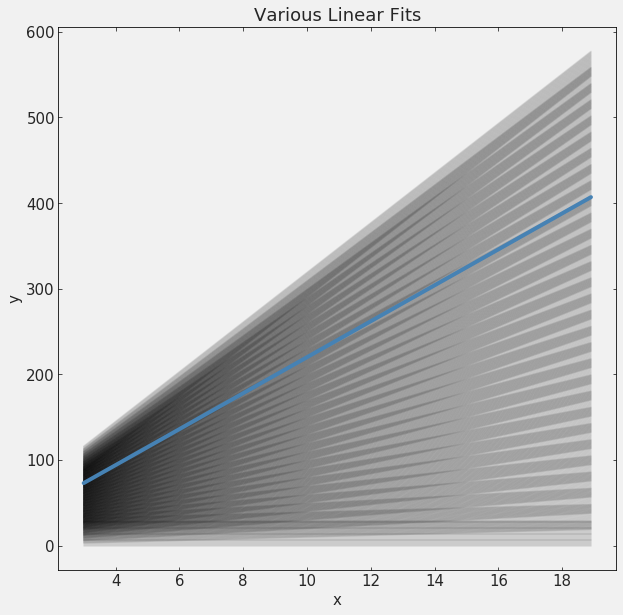

In [4]:
def loss(m, b, x, y):
    ''' L2 loss function 
    m: slope
    b: intercept
    x: data (numpy array)
    y: target (numpy array)
    ax: axis object for plot
    '''    
    return ((y - line(m, b, x))**2).sum() / x.shape[0]

res = np.zeros((30,30))
pl.figure(figsize=(10,10))
for i, m in enumerate(range(0, 30, 1)):
    for j, b in enumerate(range(0, 30, 1)):
        res[i,j] = loss(m, b, x, y)
        pl.plot(x,line(m, b, x), 'k', alpha=.1)
pl.plot(x, y, 'SteelBlue', lw=4)
pl.xlabel("x")
pl.title("Various Linear Fits")
pl.ylabel("y");

**Figure 1:** Various line fits with parameters near the correct values. The slopes and intercepts vary from 0 to 30. The correct values shown in blue overtop.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


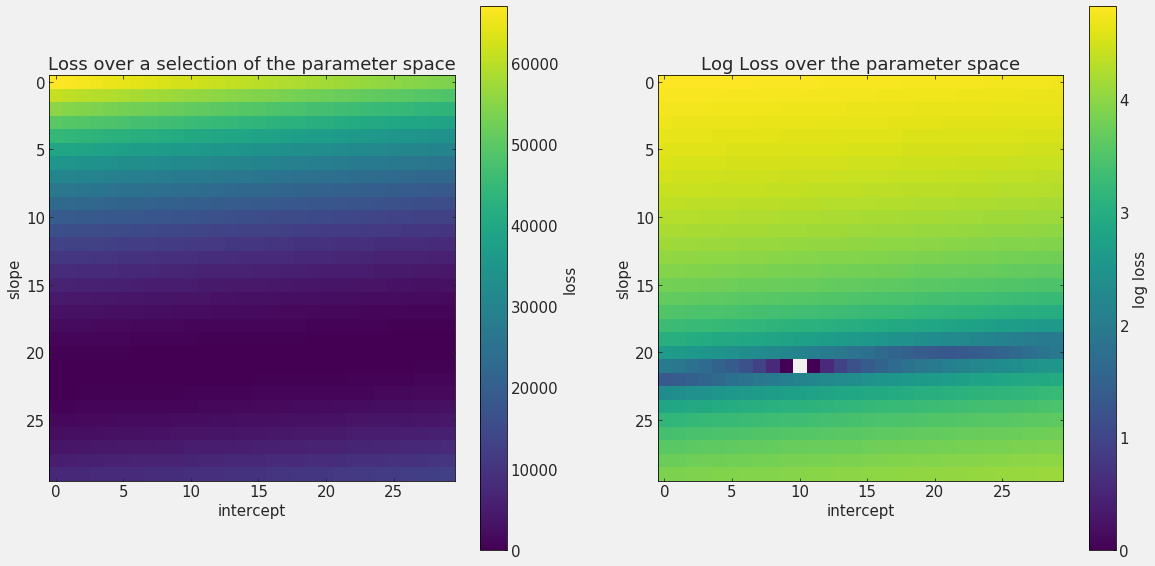

In [5]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pl.imshow(res)
pl.colorbar(label="loss")
#pl.axis('off')
pl.xlabel("intercept")
plt.title("Loss over a selection of the parameter space")
pl.ylabel("slope");

ax2 = fig.add_subplot(122)
pl.imshow(np.log10(res))
pl.colorbar(label="log loss")
# pl.axis('off')
plt.title("Log Loss over the parameter space")
pl.xlabel("intercept")
pl.ylabel("slope");

**Figure 2:** A visualization of the loss function contour. The true value (minimum loss) is in the white point on the graph on the right. The logarithm of the loss was shown to highlight details of the low-loss region.

In [0]:
# create the gradient descent

def gradDesc(m, b, x, y, alpha, ax=None):
    N = len(x)
    #partial derivative: -2x(y - (mx + b)), -2(y - (mx + b))
    f_m = np.sum(-2*x * (y - (m*x+b)))
    f_b = np.sum(-2 * (y - (m*x+b)))
    # We subtract because the derivatives point in direction of steepest ascent
    m -= f_m / float(N) * alpha
    b -= f_b / float(N) * alpha
    # print(f_m, f_b)
    if not ax is None:
      ax.plot(m, b, 'ko', alpha=0.2)

    return m, b


In [7]:
gradDesc(11, 11, x, y, 0.001)

(13.802800000000005, 11.217)

In [8]:
loss(11,11,x,y)

13905.500000000018

In [9]:
print(loss(21*1.0001,10*1.0001,x,y))
print(loss(21/1.0001,10/1.0001,x,y))

0.0006698363499987107
0.0006697024028233843



Final set of parameters: m=20.998003140256284, b=10.025728463843118. This took 7039 Gradient
 Descent steps.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


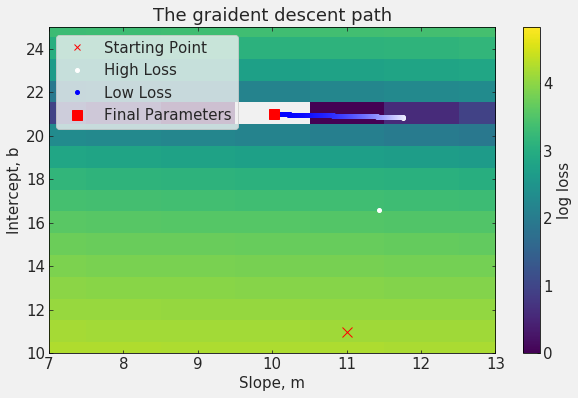

In [10]:
m = 11
b = 11
myalpha = 0.002
lost = loss(m, b, x, y)
pl.figure(figsize=(10,6))
pl.plot(b, m, "kx", alpha = 1, color=(1,0,0), markersize=10)
np.random.seed(162639)
i=0
while lost > 0.0001:
    m, b = gradDesc(m, b, x, y, myalpha)
    lost = loss(m, b, x, y)
    i += 1
    if i % 5 == 1:
        # print(f'{m:0.2f}x+\t{b:0.2f}\t\t loss =', lost)
        # pl.plot(x, line(m, b, x), c="k", alpha=0.1)
        ccolor = 2*max(0.5-lost,0)
        pl.plot(b, m, ".", color=(1-ccolor,1-ccolor,1), markersize=8)
print(f"\nFinal set of parameters: m={m}, b={b}. This took {i} Gradient\n\
 Descent steps.")
pl.plot(b, m, 'rs', markersize = 10)

legend_elements = [Line2D([0], [0], lw = 0, marker="x", color=(1,0,0),
                          label='Starting Point'),
                   Line2D([0], [0], lw = 0, marker=".", color=(1,1,1),
                          markersize=8, label='High Loss'),
                   Line2D([0], [0], lw = 0, marker=".", color=(0,0,1),
                          markersize=8, label='Low Loss'),
                   Line2D([0], [0], lw = 0, marker="s", color=(1,0,0),
                          markersize = 10, label='Final Parameters')]

# Create the figure
# fig, ax = plt.subplots()
plt.legend(handles=legend_elements)
plt.imshow(np.log10(res), origin='lower', aspect='auto')
plt.ylim(10,25)
plt.xlim(7,13)
plt.colorbar(label="log loss")
plt.xlabel("Slope, m")
plt.ylabel("Intercept, b")
plt.title("The graident descent path")
plt.show()


**Figure 3:** Every 5th point of the gradient descent path is shown here. Notice how the algorithm moves quicker when it's further from the true values.